In [59]:
import sys
from pathlib import Path

# Add src/ to sys.path
project_root = Path().resolve().parent  # assumes you're in notebooks/
src_path = project_root / "src"
sys.path.append(str(src_path))

In [66]:
from pathlib import Path

import pandas as pd

project_root = Path().resolve().parent

# Audio + v2_ accel (precomputed)
df_audio = pd.read_csv(project_root / "data" / "processed" / "features_audio.csv")

# Your self-engineered accel features
df_accel = pd.read_csv(project_root / "data" / "processed" / "features_accel.csv")

In [68]:
df_accel.columns

Index(['x_mean', 'x_std', 'x_mad', 'x_iqr', 'x_min', 'x_max', 'x_energy',
       'x_jerk_mean', 'x_jerk_std', 'x_zcr', 'x_spectral_entropy',
       'x_dominant_freq', 'x_spectral_centroid', 'x_entropy', 'y_mean',
       'y_std', 'y_mad', 'y_iqr', 'y_min', 'y_max', 'y_energy', 'y_jerk_mean',
       'y_jerk_std', 'y_zcr', 'y_spectral_entropy', 'y_dominant_freq',
       'y_spectral_centroid', 'y_entropy', 'z_mean', 'z_std', 'z_mad', 'z_iqr',
       'z_min', 'z_max', 'z_energy', 'z_jerk_mean', 'z_jerk_std', 'z_zcr',
       'z_spectral_entropy', 'z_dominant_freq', 'z_spectral_centroid',
       'z_entropy', 'corr_xy', 'corr_yz', 'corr_xz', 'mag_mean', 'mag_std',
       'mag_mad', 'mag_iqr', 'mag_energy', 'mag_jerk_mean', 'mag_jerk_std',
       'sma', 'mag_spectral_entropy', 'mag_dominant_freq',
       'mag_spectral_centroid', 'mag_zcr', 'row_id', 'start_idx', 'start_time',
       'activity', 'sensor', 'source_file', 'user'],
      dtype='object')

In [62]:
# Audio dataset
df_audio["row_id"] = (
    df_audio["userid"]
    + "_"
    + df_audio["label"]
    + "_"
    + df_audio.groupby(["userid", "label"]).cumcount().astype(str)
)

# Accel dataset
df_accel["row_id"] = (
    df_accel["user"]
    + "_"
    + df_accel["activity"]
    + "_"
    + df_accel.groupby(["user", "activity"]).cumcount().astype(str)
)

In [63]:
# Merge audio and accel
df_fusion = pd.merge(df_audio, df_accel, on="row_id", suffixes=("_audio", "_accel"))

# Drop v2_ columns only (exclude precomputed accel features)
v2_cols = [c for c in df_fusion.columns if c.startswith("v2_")]
df_clean = df_fusion.drop(columns=v2_cols)

# Optional: Check final column structure
print(f"✅ Merged: {len(df_clean)} rows, {df_clean.shape[1]} columns")

# Save cleaned fusion data
df_clean.to_csv(project_root / "data" / "processed" / "fusion_features.csv", index=False)

✅ Merged: 1183 rows, 102 columns


In [88]:
meta_cols = [
    "row_id",
    "start_idx",
    "start_time",
    "activity",
    "sensor",
    "source_file",
    "user",
    "user2",
    "userid",
    "label",
]

# Separate features (X) and labels (y)
X = df_fusion.drop(columns=meta_cols, errors="ignore")
y = df_fusion["activity"].astype(str)

In [89]:
X.columns

Index(['v1_mfcc1', 'v1_mfcc2', 'v1_mfcc3', 'v1_mfcc4', 'v1_mfcc5', 'v1_mfcc6',
       'v1_mfcc7', 'v1_mfcc8', 'v1_mfcc9', 'v1_mfcc10', 'v1_mfcc11',
       'v1_mfcc12', 'v1_mfcc13', 'v1_mfcc14', 'v1_mfcc15', 'v1_mfcc16',
       'v1_mfcc17', 'v1_mfcc18', 'v1_mfcc19', 'v1_mfcc20', 'v1_mfcc21',
       'v1_mfcc22', 'v1_mfcc23', 'v1_mfcc24', 'v1_mfcc25', 'v1_mfcc26',
       'v1_mfcc27', 'v1_mfcc28', 'v1_mfcc29', 'v1_mfcc30', 'v1_mfcc31',
       'v1_mfcc32', 'v1_mfcc33', 'v1_mfcc34', 'v1_mfcc35', 'v1_mfcc36',
       'x_mean', 'x_std', 'x_mad', 'x_iqr', 'x_min', 'x_max', 'x_energy',
       'x_jerk_mean', 'x_jerk_std', 'x_zcr', 'x_spectral_entropy',
       'x_dominant_freq', 'x_spectral_centroid', 'x_entropy', 'y_mean',
       'y_std', 'y_mad', 'y_iqr', 'y_min', 'y_max', 'y_energy', 'y_jerk_mean',
       'y_jerk_std', 'y_zcr', 'y_spectral_entropy', 'y_dominant_freq',
       'y_spectral_centroid', 'y_entropy', 'z_mean', 'z_std', 'z_mad', 'z_iqr',
       'z_min', 'z_max', 'z_energy', 'z_jerk_mean

In [73]:
X

,userid,label,v1_mfcc1,v1_mfcc2,v1_mfcc3,v1_mfcc4,v1_mfcc5,v1_mfcc6,v1_mfcc7,v1_mfcc8,...,mag_mad,mag_iqr,mag_energy,mag_jerk_mean,mag_jerk_std,sma,mag_spectral_entropy,mag_dominant_freq,mag_spectral_centroid,mag_zcr
0,user1,watch_tv,120.078886,3.025171,0.390508,-1.777848,-9.216060,-6.567632,-9.918761,-9.145534,...,0.028428,0.055812,1.050042,0.000700,0.097907,1.393954,3.923729,4.358824,4.585623,0.0
1,user1,watch_tv,130.243139,2.552278,-6.457879,-7.440159,-3.070106,-3.475476,-5.718819,-2.878174,...,0.022059,0.039408,1.013299,0.003743,0.129320,1.383961,4.589229,2.011765,4.172187,0.0
2,user1,watch_tv,122.259209,1.970267,-8.980575,-10.222030,-3.564994,-2.496906,-5.584900,-6.730588,...,0.002854,0.005956,1.004750,-0.000915,0.025015,1.338250,4.577745,4.694118,5.833070,0.0
3,user1,watch_tv,122.609566,3.188740,-7.049397,-10.569875,-0.220824,-0.649459,-4.975825,-6.856288,...,0.001807,0.003942,1.008005,-0.000498,0.007462,1.347019,4.615771,5.364706,7.121357,0.0
4,user1,watch_tv,121.393023,1.338798,-8.706183,-8.654997,-4.935310,-3.401656,-5.031361,-7.957924,...,0.001371,0.002621,1.005915,0.000043,0.004082,1.353185,4.617361,7.711765,8.083768,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,user3,brush_teeth,117.222391,-15.073130,-3.531585,-2.419886,0.764395,-6.819516,-4.366153,1.915244,...,0.174306,0.452657,1.243839,0.002275,0.330962,1.736199,3.411797,4.023529,5.131426,0.0
1179,user3,brush_teeth,116.244831,-11.068027,-4.964638,1.296009,-1.850628,-3.548612,-0.543633,2.152386,...,0.142496,0.271666,1.309767,-0.003401,0.269409,1.688439,4.280094,7.376471,6.875421,0.0
1180,user3,brush_teeth,118.903814,-13.585450,-9.870121,-1.513145,8.011189,-11.133588,-2.063369,2.423204,...,0.140335,0.292908,1.299100,0.004241,0.282139,1.740993,4.714408,8.047059,8.276260,0.0
1181,user3,brush_teeth,116.476788,-11.373914,-8.685811,0.005276,6.822317,-10.107997,-2.146989,3.243954,...,0.113863,0.303346,1.267077,-0.002502,0.318068,1.649078,4.385339,3.688235,7.079998,0.0


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [87]:
X

,userid,label,v1_mfcc1,v1_mfcc2,v1_mfcc3,v1_mfcc4,v1_mfcc5,v1_mfcc6,v1_mfcc7,v1_mfcc8,...,mag_mad,mag_iqr,mag_energy,mag_jerk_mean,mag_jerk_std,sma,mag_spectral_entropy,mag_dominant_freq,mag_spectral_centroid,mag_zcr
0,user1,watch_tv,120.078886,3.025171,0.390508,-1.777848,-9.216060,-6.567632,-9.918761,-9.145534,...,0.028428,0.055812,1.050042,0.000700,0.097907,1.393954,3.923729,4.358824,4.585623,0.0
1,user1,watch_tv,130.243139,2.552278,-6.457879,-7.440159,-3.070106,-3.475476,-5.718819,-2.878174,...,0.022059,0.039408,1.013299,0.003743,0.129320,1.383961,4.589229,2.011765,4.172187,0.0
2,user1,watch_tv,122.259209,1.970267,-8.980575,-10.222030,-3.564994,-2.496906,-5.584900,-6.730588,...,0.002854,0.005956,1.004750,-0.000915,0.025015,1.338250,4.577745,4.694118,5.833070,0.0
3,user1,watch_tv,122.609566,3.188740,-7.049397,-10.569875,-0.220824,-0.649459,-4.975825,-6.856288,...,0.001807,0.003942,1.008005,-0.000498,0.007462,1.347019,4.615771,5.364706,7.121357,0.0
4,user1,watch_tv,121.393023,1.338798,-8.706183,-8.654997,-4.935310,-3.401656,-5.031361,-7.957924,...,0.001371,0.002621,1.005915,0.000043,0.004082,1.353185,4.617361,7.711765,8.083768,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,user3,brush_teeth,117.222391,-15.073130,-3.531585,-2.419886,0.764395,-6.819516,-4.366153,1.915244,...,0.174306,0.452657,1.243839,0.002275,0.330962,1.736199,3.411797,4.023529,5.131426,0.0
1179,user3,brush_teeth,116.244831,-11.068027,-4.964638,1.296009,-1.850628,-3.548612,-0.543633,2.152386,...,0.142496,0.271666,1.309767,-0.003401,0.269409,1.688439,4.280094,7.376471,6.875421,0.0
1180,user3,brush_teeth,118.903814,-13.585450,-9.870121,-1.513145,8.011189,-11.133588,-2.063369,2.423204,...,0.140335,0.292908,1.299100,0.004241,0.282139,1.740993,4.714408,8.047059,8.276260,0.0
1181,user3,brush_teeth,116.476788,-11.373914,-8.685811,0.005276,6.822317,-10.107997,-2.146989,3.243954,...,0.113863,0.303346,1.267077,-0.002502,0.318068,1.649078,4.385339,3.688235,7.079998,0.0


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define ML pipeline
fusion_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ]
)

# Train
fusion_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2


Audio-Only Model Performance:

                  precision    recall  f1-score   support

     brush_teeth       1.00      0.84      0.91        31
       eat_chips       0.89      1.00      0.94        50
       mop_floor       0.96      0.84      0.90        31
           sweep       0.88      0.94      0.91        31
type_on_keyboard       1.00      1.00      1.00        31
      wash_hands       0.90      0.93      0.92        29
        watch_tv       0.97      0.97      0.97        34

        accuracy                           0.94       237
       macro avg       0.94      0.93      0.93       237
    weighted avg       0.94      0.94      0.94       237



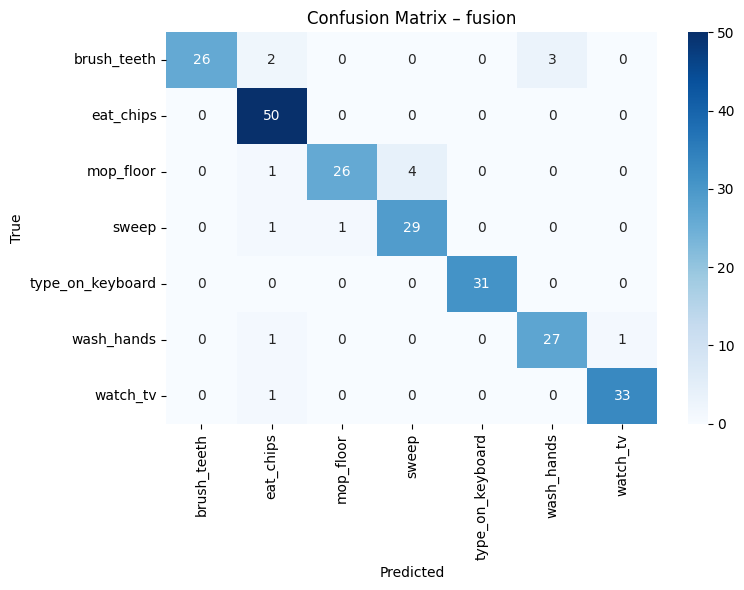

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = fusion_pipeline.predict(X_test)

# Metrics
print("Audio-Only Model Performance:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=fusion_pipeline.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=fusion_pipeline.classes_,
    yticklabels=fusion_pipeline.classes_,
    cmap="Blues",
)
plt.title("Confusion Matrix – fusion")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [94]:
from wearable_htad.evaluation.metrics import evaluate_model

# After predicting:
result_fusion = evaluate_model(y_test, y_pred, name="Fusion Model")
from wearable_htad.evaluation.metrics import evaluate_model

# After predicting:

result_df = pd.DataFrame([evaluate_model(y_test, y_pred, name="Fusion Model")])
result_df.to_csv(Path("outputs/fusion_metrics.csv"), index=False)